# Introduction

This project corresponds to the development of the final project of the Data Science Career Path of Codecademy. This project proceeds to analyze information regarding the real estate market in the Autonomous City of Buenos Aires, Argentina. 
For this purpose, information obtained from the Properati website is used. 

***
### About the company: 
Properati is a web and mobile property platform in charge of selling and leasing real estate in Latin America.


### Data sources:

The project has one data set provided by [Properati](https://www.properati.com.ar/data/) called `properati.csv`. In the data, each row represents a selling real state operation. Each column represents different attributes of the selling operation. For example, house location, numbers of rooms, price, etc. 


### Project Goal

In this project, the goal is to create and optimize a machine learning model that, given certain characteristics of an apartment located in the Federal Capital, allows to predict its sale value in dollars.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. The following tasks will be carried out:
- Exploratory analysis of the data.
- Analysis of missing values, outliers, coding of categorical variables and scaling of quantitative variables.
- Training and testing of different regression models.
- Optimization of the model with the best performance.

### Evaluation

The project will conclude with the evaluation of the machine learning models selected with a validation dataset. The output of the predictions can be checked through a *r2 score*. This is an index that reflects the goodness of fit of a model to the variable that it tries to explain. Its result ranges from 0 to 1. The closer its value is to 1, the better the fit of the model to the variable we are trying to explain.
***

#### 1. Import Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### 2. Import Data

In [2]:
df = pd.read_csv('properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#### 3. Preliminary analysis of the dataset:
Here we proceed to analyze the main elements of the dataset such as:
- Its shape and size.
- Column information.
- Unique values.
- Filtering the dataset to perform the EDA

In [3]:
# Shape
df.shape

(146660, 19)

In [4]:
# Size
len(df)

146660

In [5]:
# Columns Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [6]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [7]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

These columns describe the following characteristics of each property:
- `start_date`: Date of registration of the notice.
- `end_date`:Date of cancellation of the notice.
- `created_on`: Date of registration of the first version of the notice.
- `lat`: Latitude.
- `lon`: Length.
- `l1`: Country where the property is located.
- `l2`: Province where the property is located.
- `l3`: City where the property is located.
- `rooms`: Number of rooms in the property.
- `bedrooms`: Number of bedrooms in the property.
- `bathrooms`: Number of bathrooms in the property.
- `surface_total`: Total area in square meters.
- `surface_covered`: Covered area in square meters.
- `price`: Property price.
- `currency`: Coin operation.
- `title`: Title of the ad.
- `description`: Description of the advertisement.
- `property_type`: Kind of property.
- `operation_type`: Type of operation (Sale or Rent).

The unique values for the following columns will be analyzed: `l1`, `l2`, `l3`, `currency`, `property_type` and `operation_type`.

In [8]:
# Unique values.
columns = ['l1', 'l2', 'l3', 'currency', 'property_type', 'operation_type']

for column in columns:
    print('-'*50)
    print('Column name: {c}'.format(c = column.upper()))
    print(df[column].value_counts())

--------------------------------------------------
Column name: L1
Argentina    146660
Name: l1, dtype: int64
--------------------------------------------------
Column name: L2
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64
--------------------------------------------------
Column name: L3
Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64
--------------------------------------------------
Column name: CURRENCY
USD    146660
Name: currency, dtype: int64
--------------------------------------------------
Column name: PROPERTY_TYPE
Departamento       107326
Casa                21521
PH                  14298
Lote           

Through the unique value loop it is possible to detect that many of the columns in the dataset have only one value. For example:
- `l1` indicates that it only owns properties in Argentina.
- `operation_type` has only sales operations, the column
- `currency` is established only in dollars.


Others columns have multiple values. For example:
- `property_type` has 10 different types of properties.
- These properties are located in 4 different regions of the City of Buenos Aires (`l2`), located in 89 different neighborhoods (`l3`).

I will graph the number of existing property types. In addition, I will check the locations with the highest number of ads.

In [9]:
tipos_prop = df.groupby('property_type').start_date.count().reset_index()
tipos_prop.rename(columns = {'property_type':'Tipo de Propiedad', 'start_date' : 'Cantidad'}, inplace=True)

tipos_prop_asc = tipos_prop.sort_values(by=['Cantidad'], ascending = False).reset_index(drop=True)
tipos_prop_asc.loc[10] = ['Otras propiedades', tipos_prop_asc.Cantidad[3:10].sum()]

prop_agrupadas = tipos_prop_asc.sort_values(by=['Cantidad'], ascending = False).reset_index(drop=True)
prop_agrupadas = prop_agrupadas[:4]

otras_prop = tipos_prop_asc[3:10].reset_index()
otras_prop.drop(['index'], axis=1, inplace=True)

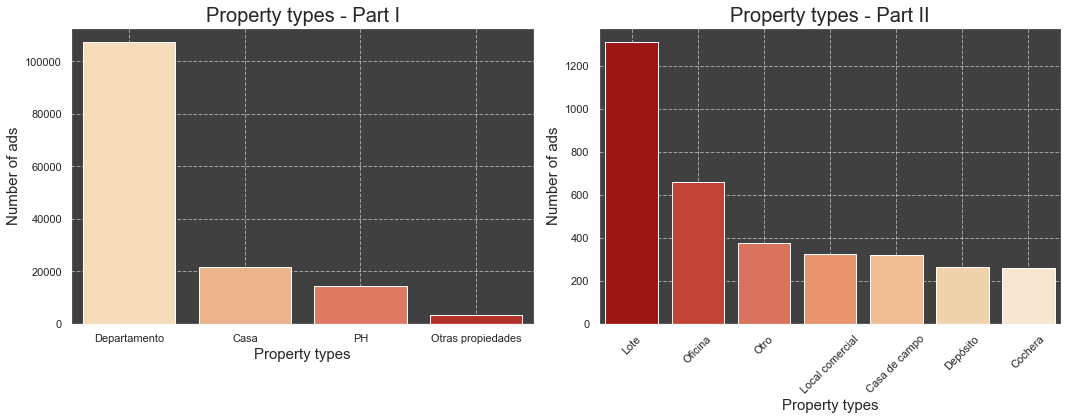

In [121]:
fig = plt.figure(figsize = (15,6))

ax1 = fig.add_subplot(121)
ax1 = sns.barplot(data = prop_agrupadas, x = 'Tipo de Propiedad', y = 'Cantidad', palette = 'OrRd')
ax1.set_title('Property types - Part I', fontsize = 20)
ax1.set_xlabel('Property types', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)

ax2 = fig.add_subplot(122)
ax2 = sns.barplot(data = otras_prop, x = 'Tipo de Propiedad', y = 'Cantidad', palette = 'OrRd_r')
plt.xticks(rotation=45)
ax2.set_title('Property types - Part II', fontsize = 20)
ax2.set_xlabel('Property types', fontsize =15)
ax2.set_ylabel('Number of ads', fontsize = 15)
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()

It is observed that the properties announced correspond to the Capital Federal(CABA) and Gran Buenos Aires (GBA). The latter, also called "Conurbano Bonaerense", is part of the Province of Buenos Aires but separated from the Autonomous City. The Conurbano is the urban nucleus that surrounds the Capital Federal.

In [57]:
region = df.groupby(['l2']).start_date.count().reset_index()
region.rename(columns = {'l2':'Región', 'start_date': 'Cantidad'}, inplace=True)
region_sorted = region.sort_values(by=['Cantidad'], ascending = False).reset_index(drop=True)

In [58]:
localidad = df.groupby(['l3']).start_date.count().reset_index()
localidad.rename(columns = {'l3':'Localidad', 'start_date': 'Cantidad'}, inplace=True)
localidad_sorted = localidad.sort_values(by=['Cantidad'], ascending = False).reset_index(drop=True)

In [89]:
localidad_sorted.loc[89] = ['Otras localidades', localidad_sorted.Cantidad[localidad_sorted.Cantidad <= 1000].sum()]
loc_agrupadas = localidad_sorted.sort_values(by=['Cantidad'], ascending = True).reset_index(drop=True)
loc_agrupadas = loc_agrupadas[loc_agrupadas.Cantidad >1000]

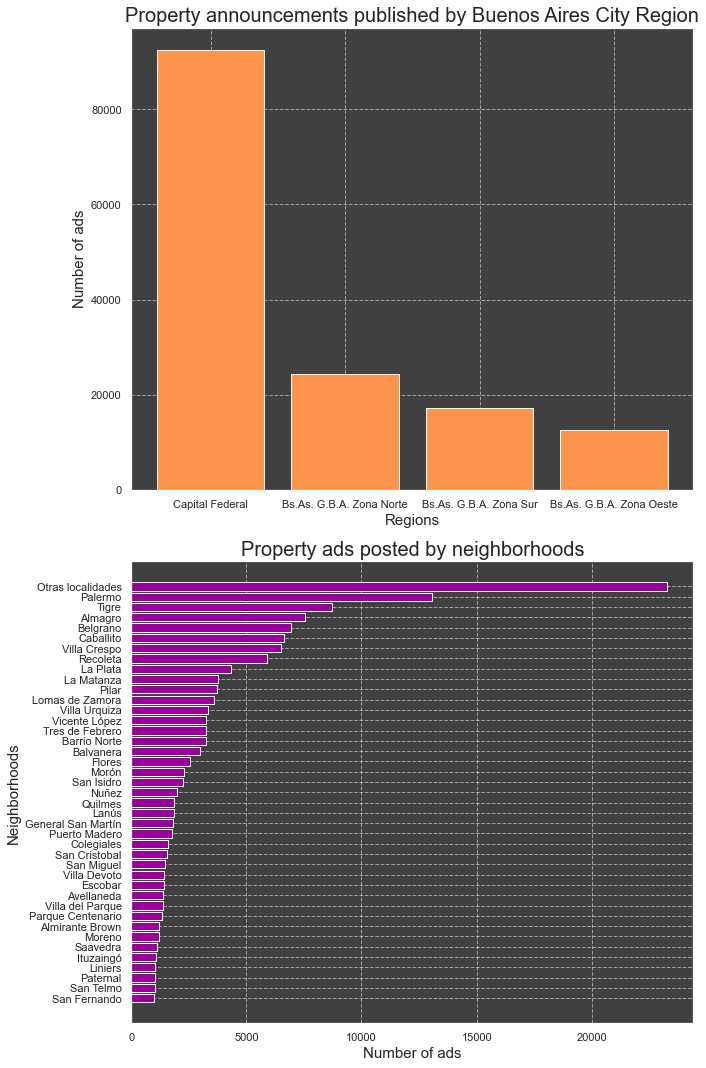

In [90]:
fig = plt.figure(figsize =(10,15))

ax1 = fig.add_subplot(2,1,1)
ax1.bar(region_sorted['Región'], region_sorted['Cantidad'], color ='#ff944d')
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.set_title('Property announcements published by Buenos Aires City Region', fontsize = 20)
ax1.set_xlabel('Regions', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)


ax2 = fig.add_subplot(2,1,2)
ax2.barh(loc_agrupadas['Localidad'], loc_agrupadas['Cantidad'], color = '#990099')
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)
ax2.set_title('Property ads posted by neighborhoods', fontsize = 20)
ax2.set_ylabel('Neighborhoods', fontsize =15)
ax2.set_xlabel('Number of ads', fontsize = 15)

plt.tight_layout()
plt.show()

It is observed that the property advertisements correspond to 89 different locations, with Palermo, Tigre, Almagro, Belgrano and Caballito being the first five locations with the highest number of publications.


**Filtering the dataset**

Given this information, and according to the objective of this project, the dataset is filtered taking into account the following parameters:

- Type of property: Apartments.
- Region of the City of Bs As: Capital Federal.

Atributes through which the models will be trained:
- `l3`
- `rooms`
- `bedrooms`
- `bathrooms`
- `surface_total`
- `surface_covered`
       
Variable to predict: `price`

In [91]:
mask = (df.l2 == 'Capital Federal') & (df.property_type == 'Departamento')

df1 = df[mask]
df1 = df1[['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df1.shape

(79029, 7)

#### 4. Exploratory Data Analysis (EDA)
We will proceed to analyze:
- Descriptive statistics
- Presence of missing values, 
- Outliers, and 
- The relationship between the variables.

In [92]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df1.describe(include = 'all')

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,79029,79029.00,79029.00,77092.00,70592.00,70315.00,79029.00
unique,57,nan,nan,nan,nan,nan,nan
top,Palermo,nan,nan,nan,nan,nan,nan
freq,11880,nan,nan,nan,nan,nan,nan
mean,NaN,2.81,1.84,1.53,98.60,86.04,259775.60
std,NaN,1.20,0.97,0.84,658.18,497.06,338968.28
min,NaN,1.00,0.00,1.00,10.00,1.00,6000.00
25%,NaN,2.00,1.00,1.00,47.00,43.00,119000.00
50%,NaN,3.00,2.00,1.00,66.00,60.00,170000.00
75%,NaN,4.00,2.00,2.00,99.00,87.00,269000.00


**Preliminary conclusions from the descriptive statistics.**

- Through the filters applied, the number of neighborhoods for the analysis has been reduced from 89 to 57.


- The variable rooms has a maximum value (21) much higher than its mean value and its median (2.81 and 3).


- The bedrooms variable presents a similar behavior to the previous variable, with a maximum value of 15 while its mean and median amount to 1.84 and 2, respectively.


- The behavior described is also present in the variable bathroom, with a maximum value of 14 bathrooms and a mean and median of 1.53 and 1, respectively.


- In these 3 variables, the standard deviation is close to 1. Therefore, it is inferred that, despite the presence of these maximum values, the data are concentrated around their mean value. This is confirmed by analyzing the 3rd quartile of these variables. This indicates that 75% of the data for these columns are 1 point above their medians and slightly above their mean.


- When observing the variables surface_total, surface_covered and price, we can see:
    - The presence of very high maximum values with respect to their mean and median values.
    - The surface_covered variable acquires minimum values equal to 1 m2. This value is unlikely to be found in reality, which may be due to an error in its loading.
    - The concentration of data around the median and the 3rd quartile (75%) allows us to induce that the data set has a bias to the right in these variables.
    - The standard deviations amount to 658.18, 497.06 and 338968.28, respectively, for which it can be induced that they present a high dispersion and the presence of positive values that deviate greatly with respect to the corresponding means.
    
    
- Despite the presence of very high maximum values with respect to their mean and median values in all quantitative variables, an extra analysis should be carried out to determine if they are atypical values.


##### A. Surface Properti Analysis.

In this section we proceed to analyze:
- The number of properties that have a covered area greater than their total area.
- The number of properties whose surface is very small.

In addition, in order to detect possible outliers, the graphs of the distribution of the variable total surface will be made.


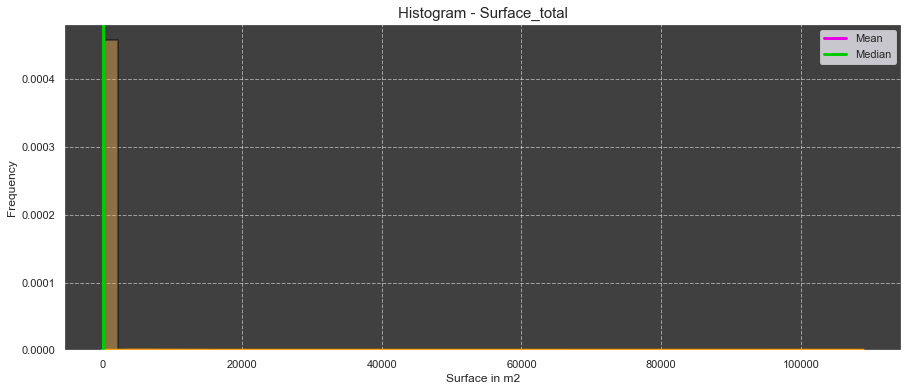

In [93]:
# Surface_total Distribution
mean_m2 = df1.surface_total.mean()
mediana_m2 = df1.surface_total.median()

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
ax = sns.distplot (df1.surface_total, bins = 50, kde_kws = {"color": "#ff9900", "linewidth": 3}, 
                    hist_kws={"color":"#ffb84d", "linewidth": 2, 
                              "edgecolor" : 'black'})
ax.axvline(mean_m2, color='#e600e6', lw = 3, label = 'Mean')
ax.axvline(mediana_m2, color='#00cc00', lw = 3, label = 'Median')

ax.set_title('Histogram - Surface_total', fontsize=15)
ax.set_xlabel('Surface in m2')
ax.set_ylabel('Frequency')

ax.set_facecolor('#404040')
ax.grid(linestyle='--', alpha = 0.5)
ax.legend()
plt.show()

From the previous graphs it is not possible to correctly visualize the behavior of the data. It is only possible to perceive that the total area data is skewed to the right. 

The axes will be adjusted so that a better view of the behavior of the data for this variable can be obtained. The data will be adjusted considering 2 times the values of the standard deviation

In [94]:
df2 = df1[df1.surface_total <= 2 * df1.surface_total.std()]

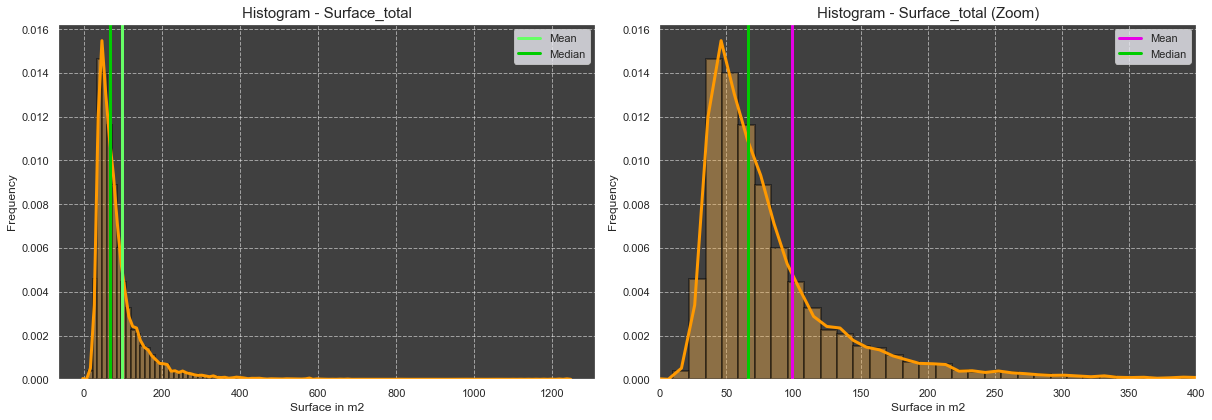

In [95]:
fig = plt.figure(figsize = (17,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.distplot (df2.surface_total, bins = 100, kde_kws = {"color": "#ff9900", "linewidth": 3}, 
                    hist_kws={"color":"#ffb84d", "linewidth": 2, 
                              "edgecolor" : 'black'})
ax1.axvline(mean_m2, color='#66ff66', lw = 3, label = 'Mean')
ax1.axvline(mediana_m2, color='#00cc00', lw = 3, label = 'Median')

ax1.set_title('Histogram - Surface_total', fontsize=15)
ax1.set_xlabel('Surface in m2')
ax1.set_ylabel('Frequency')
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.legend()


ax2 = fig.add_subplot(1,2,2)
ax2 = sns.distplot (df2.surface_total, bins = 100, kde_kws = {"color": "#ff9900", "linewidth": 3}, 
                    hist_kws={"color":"#ffb84d", "linewidth": 2, 
                              "edgecolor" : 'black'})
ax2.axvline(mean_m2, color='#e600e6', lw = 3, label = 'Mean')
ax2.axvline(mediana_m2, color='#00cc00', lw = 3, label = 'Median')

ax2.set_title('Histogram - Surface_total (Zoom)', fontsize=15)
ax2.set_xlabel('Surface in m2')
ax2.set_ylabel('Frequency')
ax2.set_xlim([0,400])
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)
ax2.legend()

plt.tight_layout()
plt.show()

With this graph, it is possible to observe the concentration of the data around its mean and median, and the bias to the right. It is also possible to observe that some part of data is concentrated around very small values (less than 15 m2),  which is strange for an apartment. These small values and the bias to the right are probably outliers.

Now, I will proceed to check how many values of surface_covered are higher than the surface_total.

In [96]:
len(df2[df2.surface_covered > df2.surface_total])

530

Considering the behavior of the data, it is recommended to eliminate those records whose covered area is greater than their total area. In addition, it is recommended not to consider in the analysis the data corresponding to surfaces smaller than 15 m2 and greater than 1000 m2.

**Price Properti Analysis**

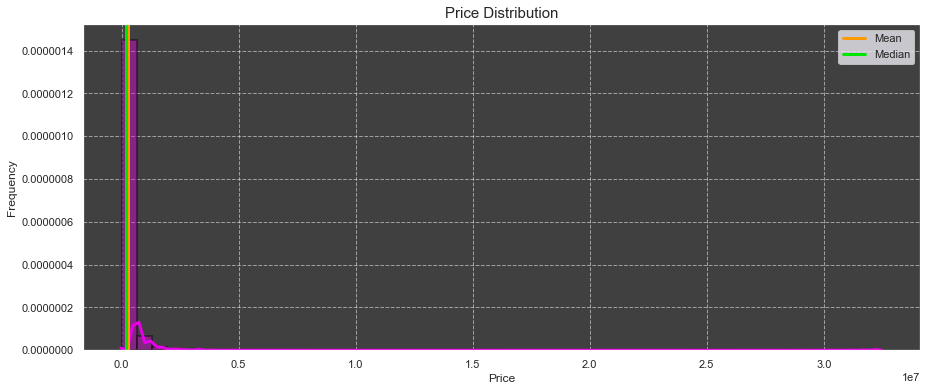

In [97]:
mean_price = df1.price.mean()
mediana_price = df1.price.median()

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
ax = sns.distplot (df1.price, bins = 50, kde_kws = {"color": "#e600e6", "linewidth": 3}, 
                    hist_kws={"color":"#e600e6", "linewidth": 2, 
                              "edgecolor" : 'black'})
ax.axvline(mean_price, color='#ff9900', lw = 3, label = 'Mean')
ax.axvline(mediana_price, color='#00e600', lw = 3, label = 'Median')

ax.set_title('Price Distribution', fontsize=15)
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

ax.set_facecolor('#404040')
ax.grid(linestyle='--', alpha = 0.5)
ax.legend()
ax.ticklabel_format(axis = 'y', useOffset=False, style='plain')

plt.show()

As when analyzing the surface, a large bias can be observed on the right side of the price variable. It is adjusted considering a limit of 2 standard deviations.

In [98]:
df2 = df1[df1.price <= 2 * df1.price.std()]

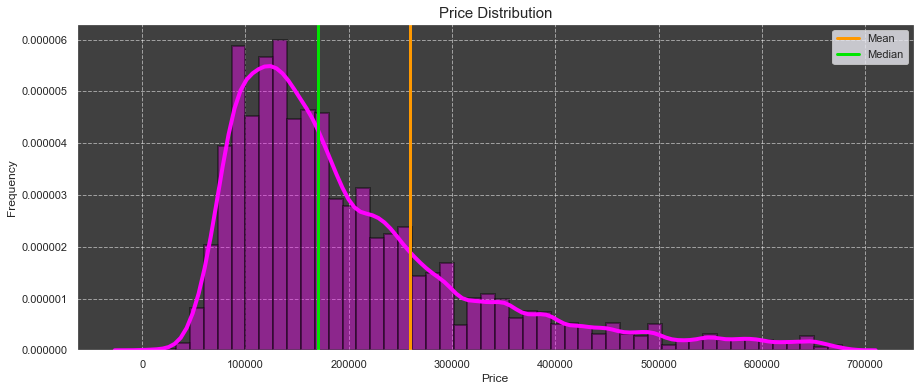

In [99]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot()
ax1 = sns.distplot (df2.price, bins = 50, kde_kws = {"color": "#ff00ff", "linewidth": 4}, 
                    hist_kws={"color":"#ff00ff", "linewidth": 2, 
                              "edgecolor" : 'black'})
ax1.axvline(mean_price, color='#ff9900', lw = 3, label = 'Mean')
ax1.axvline(mediana_price, color='#00e600', lw = 3, label = 'Median')

ax1.set_title('Price Distribution', fontsize=15)
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.legend()
ax1.ticklabel_format(axis = 'y', useOffset=False, style='plain')

plt.show()

With this filter it was possible to obtain a better visualization of the data referring to the price of the real estate units published on the site. Thus, it is possible to detect that the price increases rapidly to a value close to 1.5 million USD and then begins to decline. The mean and median of the original data (df1) are positioned to the right of the peaks of the histogram, showing how the presence of high prices influences the positioning of the mean, being to the right of the median of the original data set.

For this variable, it is recommended not to consider the records whose price is higher than 4 million dollars since the long right bias of the distribution begins here.

**Correlation between variables**

In [100]:
# Matriz de Correlación
matriz_corr = df1.corr()

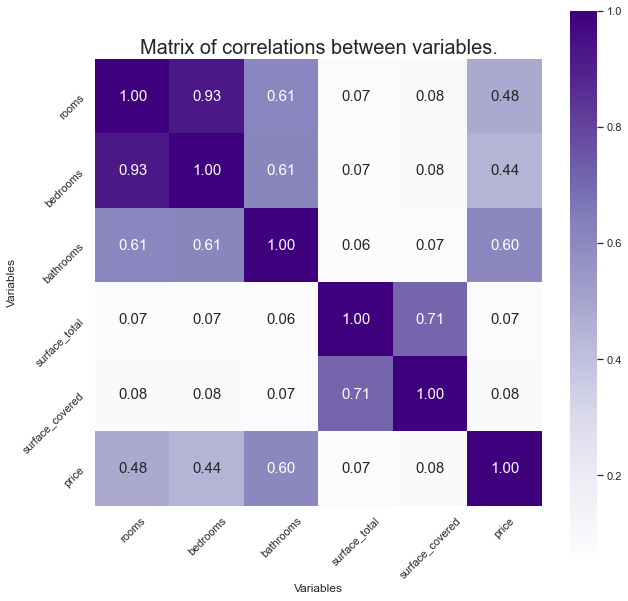

In [101]:
# Mapa de calor
plt.figure(figsize=(10,10))
sns.heatmap(matriz_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'Purples')
plt.title('Matrix of correlations between variables.', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

The correlation matrix and the heat map generated allow us to identify that the variables, in general, present a positive relationship between them. In that way, an increase in one of them could explain an increase in the other variables.

Regarding the price variable, it can be noted that it is mostly correlated with the following variables:

1. Number of bathrooms.
2. Number of rooms.
3. Number of bedrooms.

#### 5. Data preprocessing.
Based on what has been observed above, the following filters will be applied:
- Eliminate those records where the amount of covered square meters is greater than the total meters of the property.
- Delete records whose total area is greater than 1000 m2 and less than 15 m2
- Delete the records whose price is higher than 4 million dollars.

After that, the numerical variables will be standardized.

In [102]:
data = df1.copy()

mask1 = data.surface_covered <= data.surface_total
data1 = data[mask1]

mask2 = (data1.surface_total >= 15) & (data1.surface_total <= 1000)
data2 = data1[mask2]

mask3 = data2.price <= 4000000
data3 = data2[mask3]

data4 = data3.dropna()
data4.shape

(68791, 7)

In [103]:
data4.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

Standardization of quantitative variables.

In [104]:
# Quantitative variables
X = data4[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

# Qualitative variables.
X_dummies = data4[['l3']]

# Target.
y = data4['price']

In [105]:
# Se crea una columna index para luego poder hacer la fusión de las tablas.
rango = len(X_dummies)
X_dummies['index']= range(rango)

# Estandarización de las variables no dummies.
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

df_escalado = pd.DataFrame(X_scaled, columns = X.columns)

# Fusión de las tablas generadas. 
df_escalado['index'] = range(len(df_escalado))
df_escalado = pd.merge(df_escalado, X_dummies)

df_escalado = df_escalado.drop(['index'], axis = 1)

df_escalado['price'] = y.values
df_escalado.head(2)

<ipython-input-105-c7b28dff1940>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dummies['index']= range(rango)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,l3,price
0,3.46,5.41,0.56,0.85,1.16,San Cristobal,153000.00
1,-0.72,-0.93,-0.63,-0.28,-0.31,Boedo,149000.00


In [106]:
df_escalado.shape

(68791, 7)

Finally, we proceed to transform the categorical variable linked to the neighborhood where each property is located into dummies.

In [107]:
data_preproc = pd.get_dummies(df_escalado, drop_first = True)
print(data_preproc.shape)
data_preproc.head()

(68791, 62)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,3.46,5.41,0.56,0.85,1.16,153000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.72,-0.93,-0.63,-0.28,-0.31,149000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.72,-0.93,-0.63,-0.56,-0.58,115000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.72,-0.93,-0.63,-0.85,-0.82,75000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.56,-0.93,-0.63,-0.99,-0.98,48000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


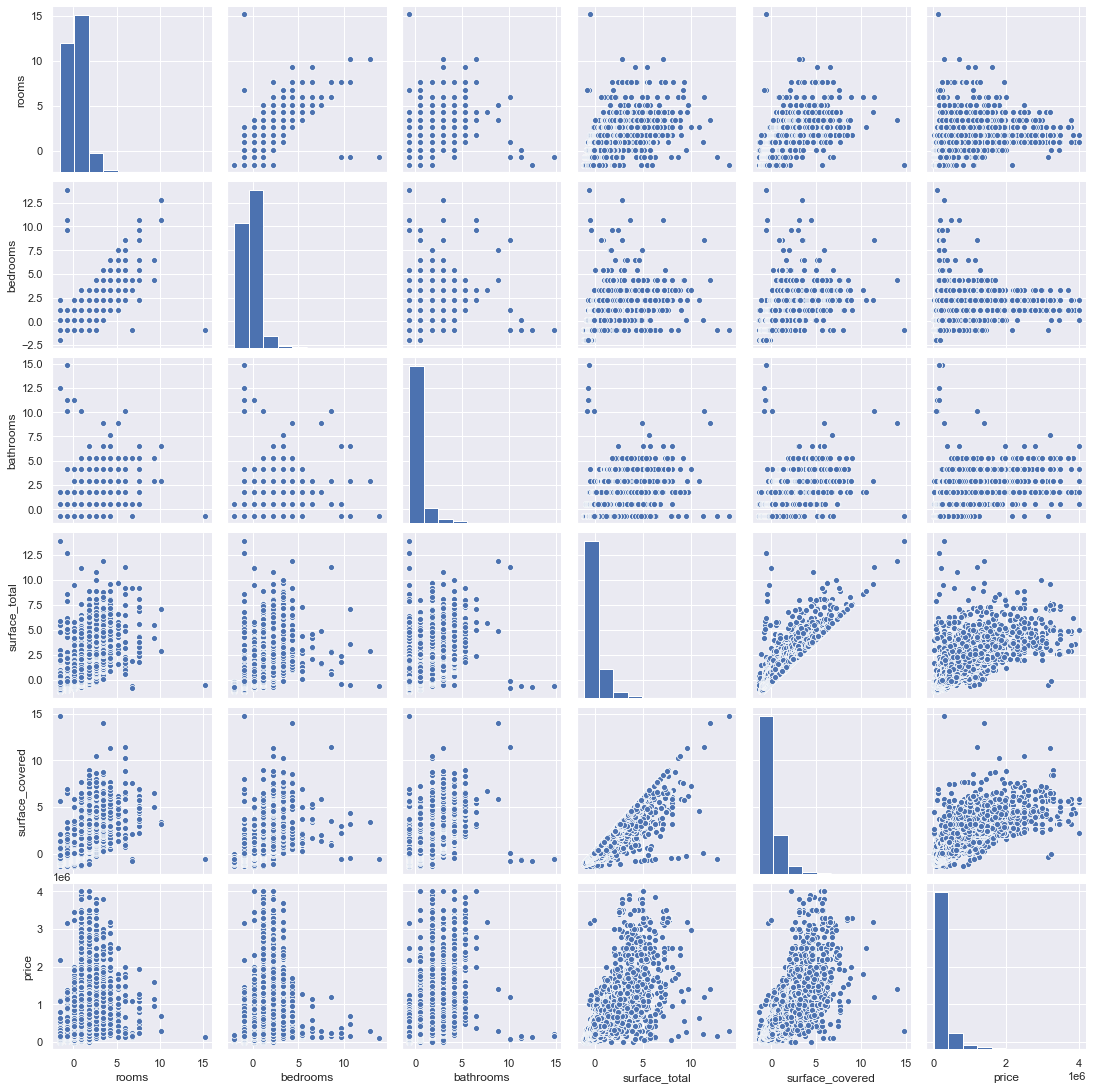

In [108]:
sns.pairplot(data_preproc, vars =['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'])

#### 6. Separation of data into training and test sets

In this case, all the selected features will be used to predict the price of the properties.

In [109]:
X = data_preproc.drop(['price'], axis = 1)
y = data_preproc['price']

print(X.shape, y.shape)

(68791, 61) (68791,)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55032, 61) (13759, 61) (55032,) (13759,)


#### 7. Training and evaluation of regression models.
In this section we will proceed to train 3 regression models:
- Decision tree.
- KNN.
- Multiple linear regression.

In order to choose the best model for optimization, these models will be evaluated through the R score using cross validation.

In [112]:
# Decision Tree Model.
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_tree.fit(X_train, y_train)

y_tree_train_predict = reg_tree.predict(X_train)
y_tree_test_predict = reg_tree.predict(X_test)

tree_r2_train = r2_score(y_train, y_tree_train_predict)
tree_r2_test = r2_score(y_test, y_tree_test_predict)

print('Maximum depth of the model:', reg_tree.get_depth())

Maximum depth of the model: 65


In [113]:
# KNN Model.
reg_knn = KNeighborsRegressor()
reg_knn.fit(X_train, y_train)

y_knn_train_predict = reg_knn.predict(X_train)
y_knn_test_predict = reg_knn.predict(X_test)

knn_r2_train = r2_score(y_train, y_knn_train_predict)
knn_r2_test = r2_score(y_test, y_knn_test_predict)

In [114]:
# Lineal Regression Model.
reg_lineal = LinearRegression()
reg_lineal.fit(X_train, y_train)

reg_train_predict = reg_lineal.predict(X_train)
reg_test_predict = reg_lineal.predict(X_test)

reg_r2_train = r2_score(y_train, reg_train_predict)
reg_r2_test = r2_score(y_test, reg_test_predict)

In [130]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
metrics = pd.DataFrame(columns = ['Model', 'R2 - Train', 'R2 - Test'])
metrics.loc[0] = ['Decision Tree', tree_r2_train, tree_r2_test] 
metrics.loc[1] = ['KNN', knn_r2_train, knn_r2_test]
metrics.loc[2] = ['Lineal Reg.',  reg_r2_train, reg_r2_test]
metrics

,Model,R2 - Train,R2 - Test
0,Decision Tree,0.9921,0.8927
1,KNN,0.9276,0.8759
2,Lineal Reg.,0.7785,0.7736


<function matplotlib.pyplot.show(*args, **kw)>

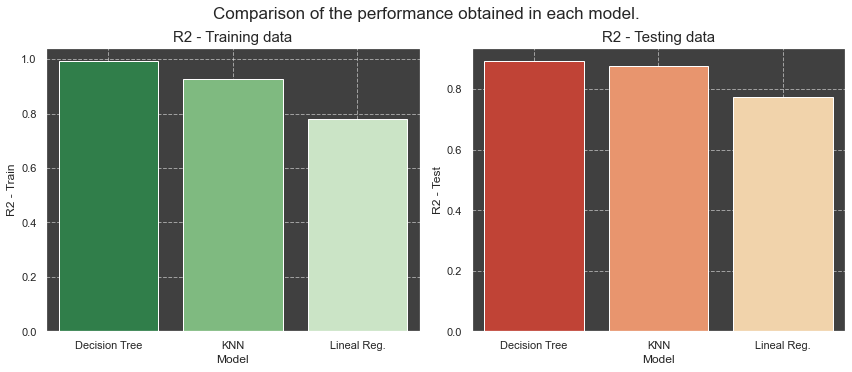

In [156]:
fig = plt.figure(figsize= (12,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(data = metrics, x = 'Model', y='R2 - Train',palette ='Greens_r')
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.set_title('R2 - Training data', fontsize = 15)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(data = metrics, x = 'Model', y = 'R2 - Test', palette ='OrRd_r')
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)
ax2.set_title('R2 - Testing data', fontsize = 15)

plt.suptitle('Comparison of the performance obtained in each model.', fontsize = 17, y=1.03)
plt.tight_layout()
plt.show

**Real values vs. Predicted Values**

In [178]:
def scatter_plot_predictions(model, y_train_predict, y_test_predict ):
    fig = plt.figure(figsize=(17,10))

    ax1 = plt.subplot(2,2,1)
    ax1 = sns.scatterplot(x= y_train, y= y_train_predict, alpha=0.2, color = '#ff9900')
    lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  
            np.max([ax1.get_xlim(), ax1.get_ylim()])]  
    ax1.plot(lims, lims, 'k-', zorder=0, color='red')
    ax1.set_title('Actual vs Predicted Values - Model: {d} - Data: Training Set'.format(d = model), fontsize = 14)
    ax1.set_xlabel('Actual Price (Millions of USD)')
    ax1.set_ylabel('Predicted Price (Millions of USD)')
    ax1.set_facecolor('#404040')
    ax1.grid(linestyle='--', alpha = 0.5)

    ax2 = plt.subplot(2,2,2)
    ax2 = sns.scatterplot(x= y_test, y= y_test_predict, alpha=0.3, color ='#b300b3')
    lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),  
            np.max([ax2.get_xlim(), ax2.get_ylim()])]  
    ax2.plot(lims, lims, 'k-', zorder=0, color='red')
    ax2.set_title('Actual vs Predicted Values - Model: {d} - Data: Testing Set'.format(d = model), fontsize = 14)
    ax2.set_xlabel('Actual Price (Millions of USD)')
    ax2.set_ylabel('Predicted Price (Millions of USD)')
    ax2.set_facecolor('#404040')
    ax2.grid(linestyle='--', alpha = 0.5)
    
    plt.tight_layout()
    plt.show()

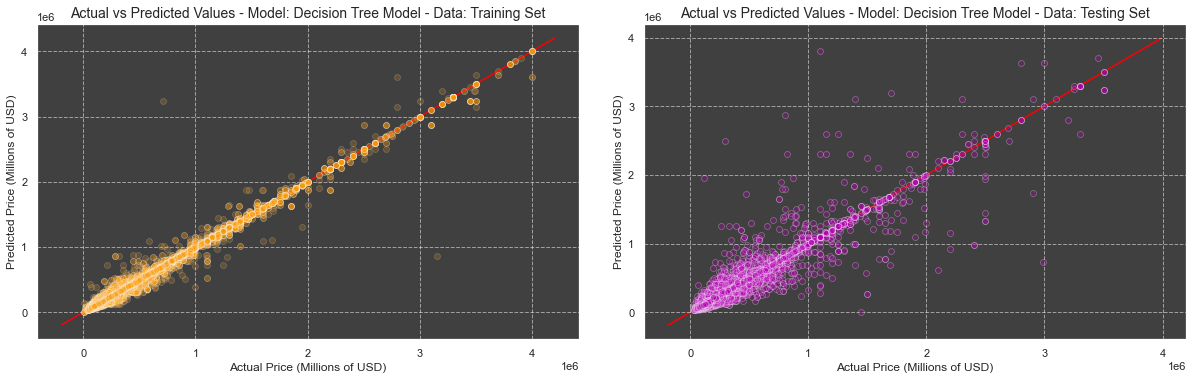

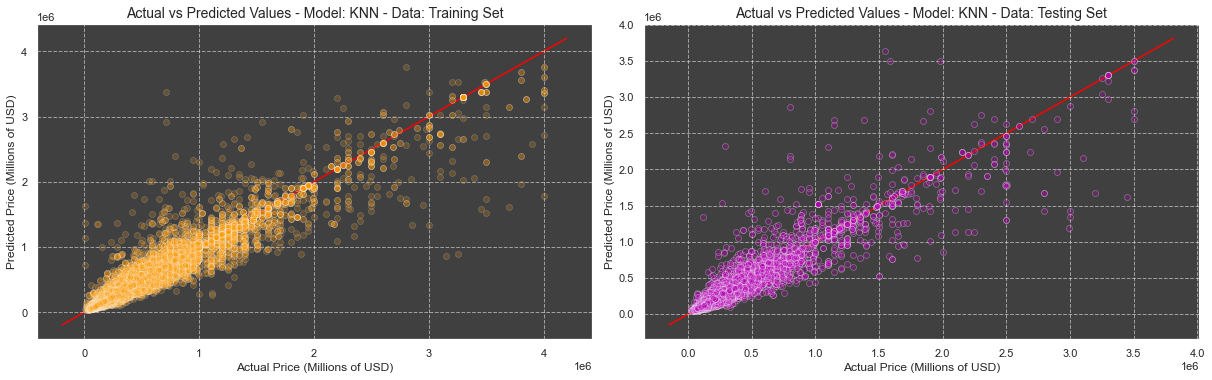

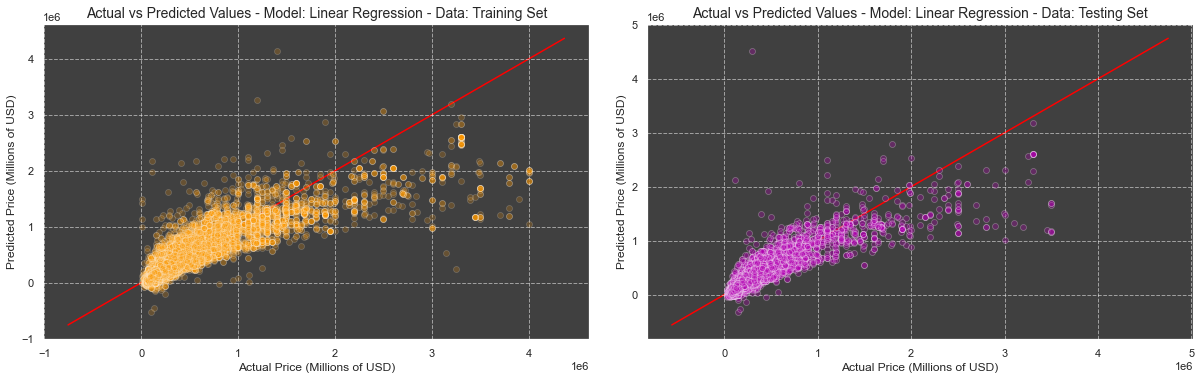

In [181]:
scatter_plot_predictions('Decision Tree Model', y_tree_train_predict, y_tree_test_predict )
scatter_plot_predictions('KNN', y_knn_train_predict, y_knn_test_predict )
scatter_plot_predictions('Linear Regression', reg_train_predict, reg_test_predict )

From these graphs it is possible to observe that:

-	The models have difficulty to predict the price of apartments that have a high market value. Thus, I can observe that the data is much more dispersed for prices above 1.5 - 2 million USD, pointing to the fact that the correct price is not being obtained.
-	By using transparency in the graphs (through the alpha parameter) it is possible to observe the different saturation levels of the colours in the graphs, transforming them into a kind of heat map. In this way, I can corroborate that for prices below 1.5 million USD, the data are concentrated close to the red line drawn. Likewise, as the price increases, saturation decreases, confirming the difficulty of the model to predict high market prices.
In general terms, the models developed can be considered as decent enough to predict the price of an apartment. However, they tend to estimate low prices for those properties that have a high market price. An explanation for this phenomenon can be:

-	The presence of outliers that are affecting the models.
-	That the models are missing an important factor that causes the price of an expensive property to be predicted as low. For example, access to public services, supermarket or public transportation that each property possesses.


**Cross Validation**

Looking at the table score metric, I can check that the Decision Tree and KNN models obtain a higher value of R2 than the Linear Regression. However, I will corroborate if these results were due to the randomness of the selected sample. To do this, I will define the next cross-validation function:

In [201]:
def cross_validation_function (model, x, y, splits = 5,  cv = 5, model_name = 'Tree'):
    '''Function that seeks to apply cross validation on a selected model. 
    Then generate a table with the average score and its standard deviation'''
    
    kfold = KFold(n_splits = splits, shuffle = True, random_state = 42)
    
    scores = cross_val_score(model, x, y, cv = cv, scoring = 'r2', n_jobs = -1)
    score_mean = round(scores.mean(), 4)
    score_std = round(scores.std()*2, 4)
    
    matrix_scores = pd.DataFrame(columns = ['Model','R2 - Mean Score', 'R2 - STD Score'],
                                data = [[model_name, score_mean, score_std]])
    return matrix_scores

In [202]:
# Cross Validation Models
tree_cv = cross_validation_function(reg_tree, X, y, splits = 5, cv = 5, model_name = 'Decision Tree')
knn_cv = cross_validation_function(reg_knn, X, y, splits = 5, cv = 5, model_name = 'KNN')
reg_cv = cross_validation_function(reg_lineal, X, y, splits = 5, cv = 5, model_name = 'Lineal Reg.')

In [203]:
metrics1 = pd.merge(tree_cv, knn_cv, how = 'outer')
metrics2 = pd.merge(metrics1, reg_cv, how = 'outer')
metrics2

,Model,R2 - Mean Score,R2 - STD Score
0,Decision Tree,0.8794,0.0541
1,KNN,0.8747,0.0386
2,Lineal Reg.,0.7708,0.0457


<function matplotlib.pyplot.show(*args, **kw)>

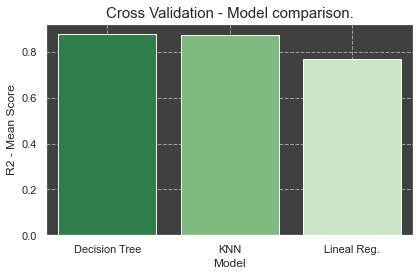

In [205]:
fig = plt.figure(figsize= (6,4))

ax = fig.add_subplot()
ax = sns.barplot(data = metrics2, x = 'Model', y ='R2 - Mean Score', palette ='Greens_r')
ax.set_facecolor('#E9F7EF')
ax.set_title('Cross Validation - Model comparison.', fontsize = 15)
ax.set_facecolor('#404040')
ax.grid(linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show

From the previous table it is possible to observe that again the decision tree model and KNN have a higher goodness of fit (r2 score) than the linear regression model. Between these two alternatives, I will proceed to optimize the decision tree model to have a better result for the performance metric.

#### 8. Optimization
To perform the optimization of the decision tree model hyperparameters, I will use the GridSearch function from Scikit-learn.

In [220]:
tree_cv

,Model,R2 - Mean Score,R2 - STD Score
0,Decision Tree,0.8794,0.0541


In [227]:
opt_model = DecisionTreeRegressor(random_state = 42)

param_grid = {'max_depth' : [10, 20, 30, 50, None],
              'min_samples_split' : [2, 3, 5, 10, 15],
              'min_samples_leaf': [2, 5, 10]}

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [228]:
model = GridSearchCV(
    estimator = opt_model,
    param_grid = param_grid,
    scoring = 'r2',
    n_jobs = -1,
    iid = False,
    refit = True,
    cv = kfold,
    verbose = 1,
    pre_dispatch = 8,
    error_score = -999,
    return_train_score = True)

model.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  2.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=-999, estimator=DecisionTreeRegressor(random_state=42),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50, None],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 5, 10, 15]},
             pre_dispatch=8, return_train_score=True, scoring='r2', verbose=1)

In [229]:
print("Mejores parametros: "+ str(model.best_params_))
print("Mejor Score: "+ str(model.best_score_)+'\n')
scores = pd.DataFrame(model.cv_results_)
scores.head()

Mejores parametros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor Score: 0.8811127599558317



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.5832,0.0303,0.0148,0.0025,10,2,2,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.8563,0.8501,...,0.8586,0.0089,73,0.9191,0.9126,0.9144,0.9108,0.9114,0.9137,0.0030
1,0.6058,0.0497,0.0149,0.0017,10,2,3,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.8563,0.8501,...,0.8586,0.0089,73,0.9191,0.9126,0.9144,0.9108,0.9114,0.9137,0.0030
2,0.5856,0.0128,0.0165,0.0043,10,2,5,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.8573,0.8463,...,0.8574,0.0075,75,0.9188,0.9121,0.9137,0.9089,0.9111,0.9129,0.0033
3,0.6611,0.0255,0.0146,0.0019,10,2,10,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.8640,0.8480,...,0.8599,0.0096,71,0.9130,0.9087,0.9112,0.9050,0.9082,0.9092,0.0027
4,0.6260,0.0224,0.0140,0.0025,10,2,15,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.8662,0.8470,...,0.8596,0.0095,72,0.9066,0.9045,0.9076,0.9017,0.9055,0.9052,0.0020


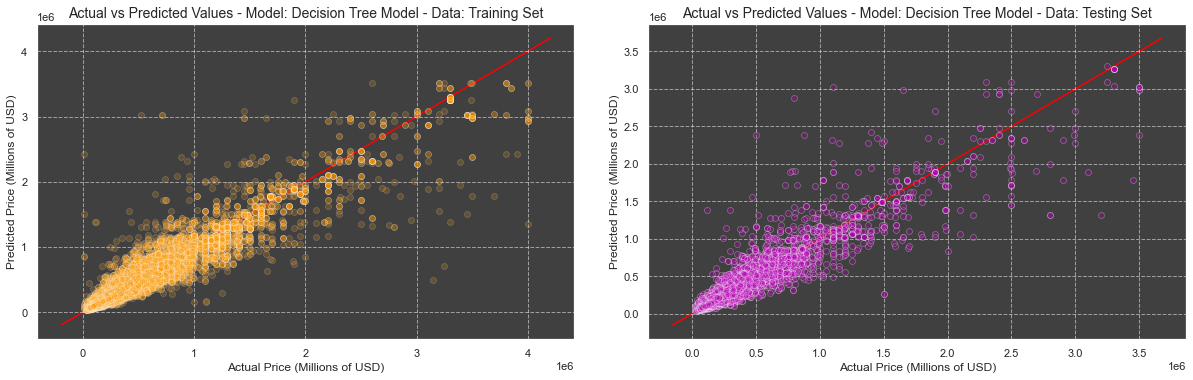

In [231]:
reg_tree = DecisionTreeRegressor(random_state = 42, max_depth = None, min_samples_split = 2, min_samples_leaf = 10)
reg_tree.fit(X_train, y_train)

y_tree_train_predict = reg_tree.predict(X_train)
y_tree_test_predict = reg_tree.predict(X_test)

scatter_plot_predictions('Decision Tree Model', y_tree_train_predict, y_tree_test_predict )

From the optimization of the hyperparameters, it was possible to obtain a better result for the training set and reduce the overfitting that occurred in the training set.

### Conclusion
#### General Comments
In this project machine learning was used to try to predict the apartment prices in Capital Federal, Argentina. In that way:  
- The decision tree model had a better predictive value than other models as KNN and Linear Regression models.
- The trained and optimized decision tree model allows us to predict (with good precision) the value of properties with a market valuation when the real price of the apartment is less than 2 million USD. But, for prices greater than 2 million USD, the model presents difficulties, so I recommend to consider these prices as reference prices.

#### Next Steps 
As the next steps, the model could be enriched by incorporating information about public services or transportation alternatives that the properties have. Incorporating this information into the model is likely to improve the accuracy of the model for estimating apartment prices. Another option is that the scope of the model could be expanded, being able to predict the price of houses, offices, etc.